In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Binarize the output
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

In [3]:
all_data = pd.read_csv("/home/bcypher/IdeaProjects/Orbit/v2articleOrbits.csv", sep="\t")



<AxesSubplot: >

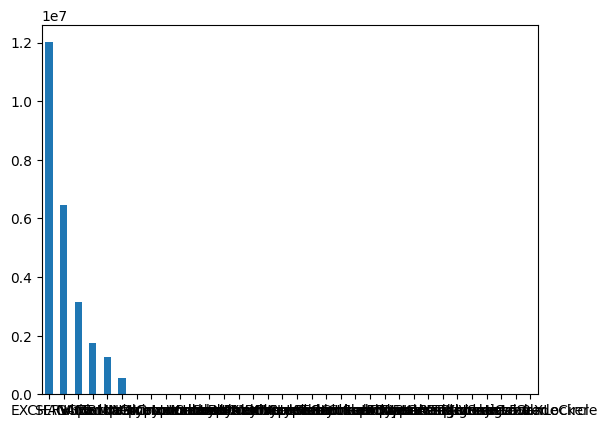

In [4]:
all_data['label'].value_counts().plot.bar(rot=0)

In [10]:
ransom_families=["montrealComradeCircle","montrealCryptXXX","montrealFlyper","montrealJigSaw","montrealWannaCry","montrealXTPLocker","montrealXLocker","paduaJigsaw","paduaKeRanger",'montrealEDA2','montrealRazy','montrealCryptoLocker', 'montrealNoobCrypt', 'montrealDMALocker', 'paduaCryptoWall', 'montrealCryptoTorLocker2015','montrealSam',
                  'montrealSamSam', 'montrealGlobeImposter', 'princetonCerber', 'montrealDMALockerv3', 'montrealGlobe',
                  'montrealAPT', 'princetonLocky', "montrealCryptConsole", "montrealGlobev3", "montrealVenusLocker", "montrealXLockerv5.0"]
all_data['label'] = all_data['label'].apply(
    lambda x: 'ransomware' if x in ransom_families else x
)

KeyboardInterrupt: 

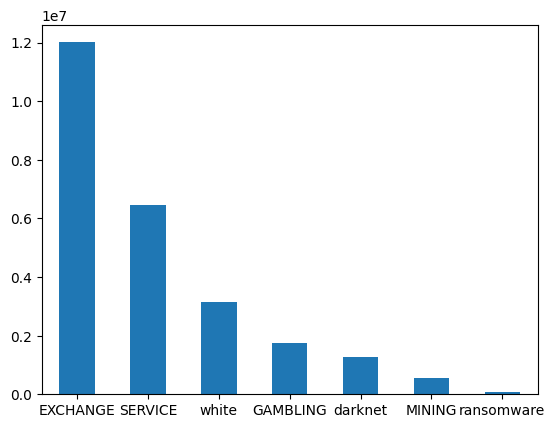

In [43]:
all_data['label'].value_counts().plot.bar(rot=0)



['white' 'ransomware' 'darknet' 'EXCHANGE' 'GAMBLING' 'SERVICE' 'MINING']


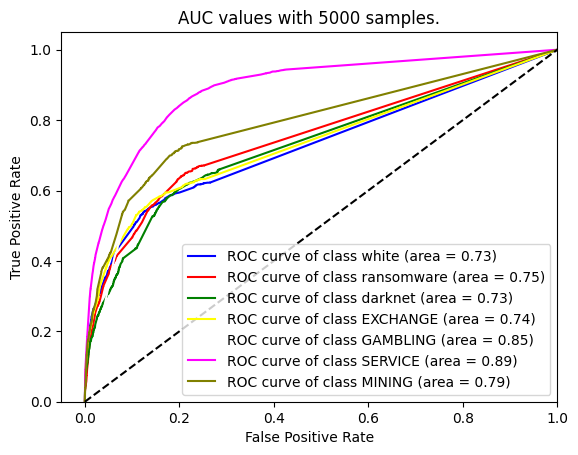

In [18]:
ransom = all_data[all_data['label'] == "ransomware"]
darknet = all_data[all_data['label'] == "darknet"]
for sample_size in [5000]:
    white = all_data[all_data['label'] == "white"]
    white_sampled = white.sample(sample_size)
    mining = all_data[all_data['label'] == "MINING"]
    mining_sampled = mining.sample(sample_size)
    #
    exchange = all_data[all_data['label'] == "EXCHANGE"]
    exchange_sampled = exchange.sample(sample_size)
    #
    service = all_data[all_data['label'] == "SERVICE"]
    service_sampled = service.sample(sample_size)

    gambling = all_data[all_data['label'] == "GAMBLING"]
    gambling_sampled = gambling.sample(sample_size)

    data = pd.concat([white_sampled,ransom,darknet, exchange_sampled,gambling_sampled,service_sampled,mining_sampled])
    X= data.iloc[:, 4:]
    #data['label'].value_counts().plot.bar(rot=0)

    y = LabelBinarizer().fit_transform(data.label.to_numpy())
    n_classes = y.shape[1]
    names = data.label.unique()
    print(names)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    classifier = OneVsRestClassifier(RandomForestClassifier())
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green','yellow','gray','magenta','olive'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("AUC values with "+str(sample_size)+" samples.")
    plt.legend(loc="lower right")
    plt.show()




['white' 'ransomware' 'darknet']


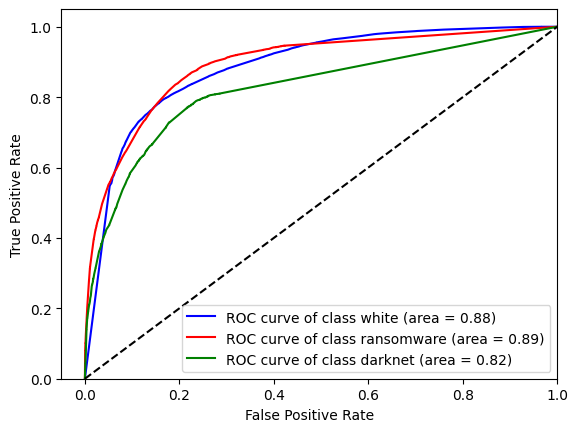

['white' 'ransomware' 'darknet']


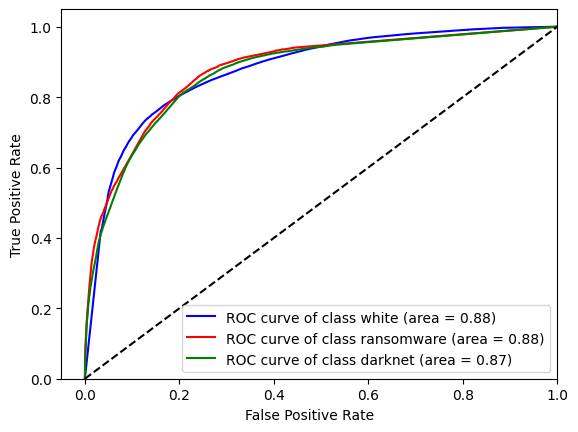

['white' 'ransomware' 'darknet']


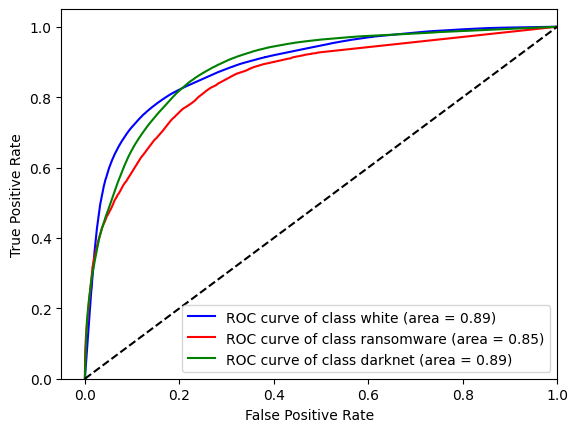

['white' 'ransomware' 'darknet']


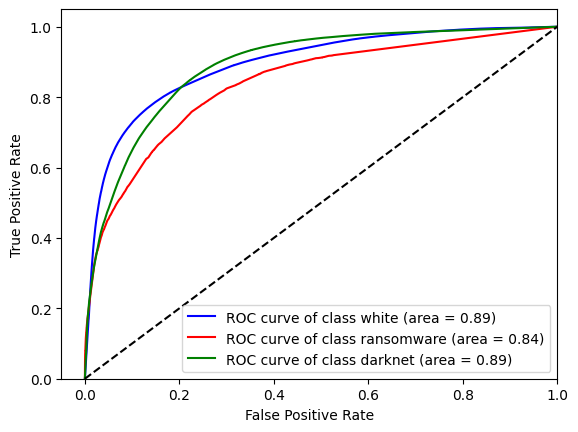

In [21]:
ransom = all_data[all_data['label'] == "ransomware"]
darknet = all_data[all_data['label'] == "darknet"]
k=1000
for sample_size in [10*k,100*k,500*k,k*k]:
    white = all_data[all_data['label'] == "white"]
    white_sampled = white.sample(sample_size)


    data = pd.concat([white_sampled,ransom,darknet])
    X= data.iloc[:, 4:]
    #data['label'].value_counts().plot.bar(rot=0)

    y = LabelBinarizer().fit_transform(data.label.to_numpy())
    n_classes = y.shape[1]
    names = data.label.unique()
    print(names)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    classifier = OneVsRestClassifier(RandomForestClassifier())
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green' ])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("")
    plt.legend(loc="lower right")
    plt.show()


['white' 'ransomware' 'darknet']


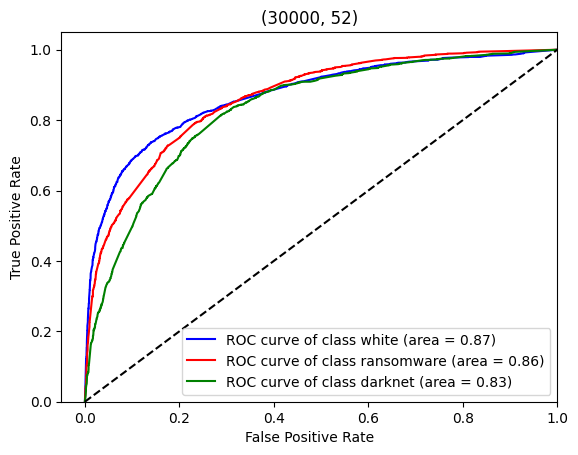

['white' 'ransomware' 'darknet']


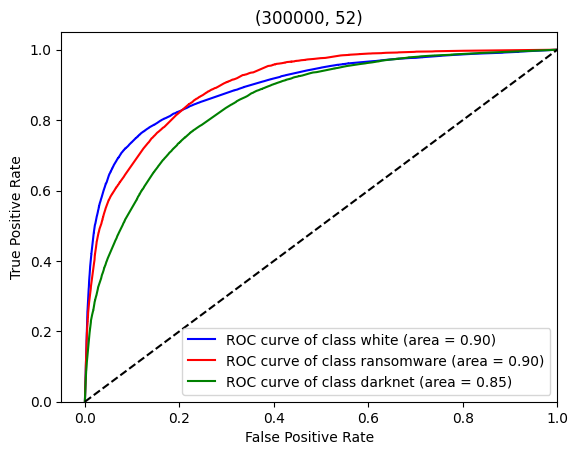

['white' 'ransomware' 'darknet']


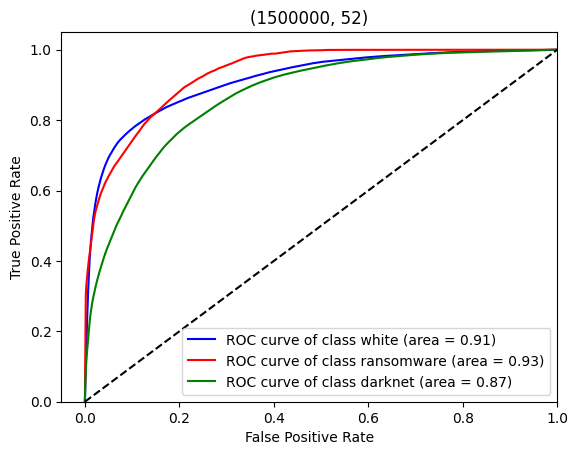

['white' 'ransomware' 'darknet']


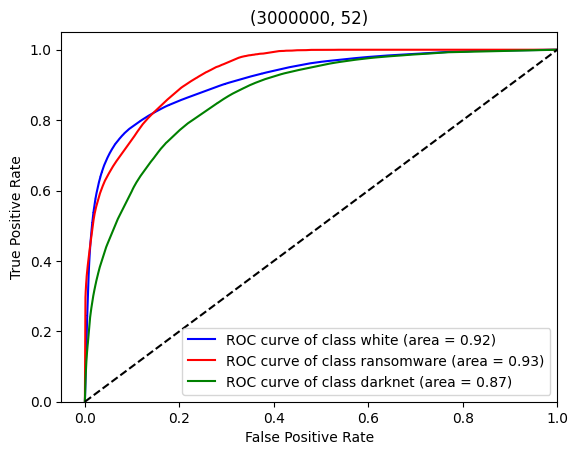

In [24]:
ransom = all_data[all_data['label'] == "ransomware"]
darknet = all_data[all_data['label'] == "darknet"]
k=1000
for sample_size in [10*k,100*k,500*k,k*k]:
    white = all_data[all_data['label'] == "white"]
    white_sampled = white.sample(sample_size)
    ransom_sampled = ransom.sample(sample_size,replace=True)
    darknet_sampled = darknet.sample(sample_size)
    data = pd.concat([white_sampled,ransom_sampled,darknet_sampled])
    X= data.iloc[:, 4:]
    #data['label'].value_counts().plot.bar(rot=0)

    y = LabelBinarizer().fit_transform(data.label.to_numpy())
    n_classes = y.shape[1]
    names = data.label.unique()
    print(names)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    classifier = OneVsRestClassifier(RandomForestClassifier())
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green' ])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                 label='ROC curve of {0} (area = {1:0.2f})'
                 ''.format(names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(data.shape)
    plt.legend(loc="lower right")
    plt.show()


In [194]:
ransom = all_data[all_data['label'] == "ransomware"]
darknet = all_data[all_data['label'] == "darknet"]
white = all_data[all_data['label'] == "white"]
data = pd.concat([white,ransom,darknet])
data['pattern'] = data[['o0', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10', 'o11', 'o12', 'o13', 'o14', 'o15', 'o16', 'o17', 'o18', 'o19', 'o20', 'o21', 'o22', 'o23', 'o24', 'o25', 'o26', 'o27', 'o28', 'o29', 'o30', 'o31', 'o32', 'o33', 'o34', 'o35', 'o36', 'o37', 'o38', 'o39', 'o40', 'o41', 'o42', 'o43', 'o44', 'o45', 'o46', 'o47']].apply(lambda x: ''.join(x.astype(str)+"\t"), axis=1)
x_patt=data.groupby(['label'])['pattern'].apply(lambda x: x.value_counts()[0:10])
x_patt

label                                                                                                                                                       
darknet     0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t     33843
            0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t     14520
            0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t     12444
            0\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t1\t2\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t      7392
            0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t1\t1\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t      7003
        

In [45]:
data.shape

(2350741, 53)

In [199]:
print(ransom.shape)
print(darknet.shape)
print(white.shape)

print(len(ransom.address.unique()))
print(len(darknet.address.unique()))

(62641, 52)
(1288100, 52)
(3164874, 52)
19930
7557


In [58]:
df1 = ransom.iloc[:,4:].drop_duplicates()
print(df1.shape)

(22682, 48)


In [64]:
df2 = darknet.iloc[:,4:].drop_duplicates()
print(df2.shape)
print(darknet.shape)


(546838, 48)
(1288100, 52)
1


In [74]:
print(ransom['address'].nunique())
print(darknet['address'].nunique())

19930
7557


non zero orbits mean 5.098612735303464


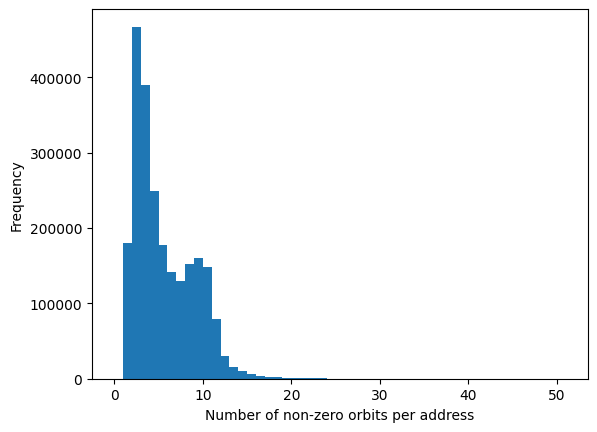

In [82]:
non_zero_counts = (data.iloc[:,4:52] != 0).sum(axis=1)
print("non zero orbits mean",non_zero_counts.mean())
plt.hist(non_zero_counts, bins = range(0, data.shape[1] - 3 + 2))
plt.xlabel("Number of non-zero orbits per address")
plt.ylabel("Frequency")
#plt.title("Histogram of non-zero orbits per address")
plt.show()

In [78]:
data.iloc[:,4:52].columns

Index(['o0', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10',
       'o11', 'o12', 'o13', 'o14', 'o15', 'o16', 'o17', 'o18', 'o19', 'o20',
       'o21', 'o22', 'o23', 'o24', 'o25', 'o26', 'o27', 'o28', 'o29', 'o30',
       'o31', 'o32', 'o33', 'o34', 'o35', 'o36', 'o37', 'o38', 'o39', 'o40',
       'o41', 'o42', 'o43', 'o44', 'o45', 'o46', 'o47'],
      dtype='object')

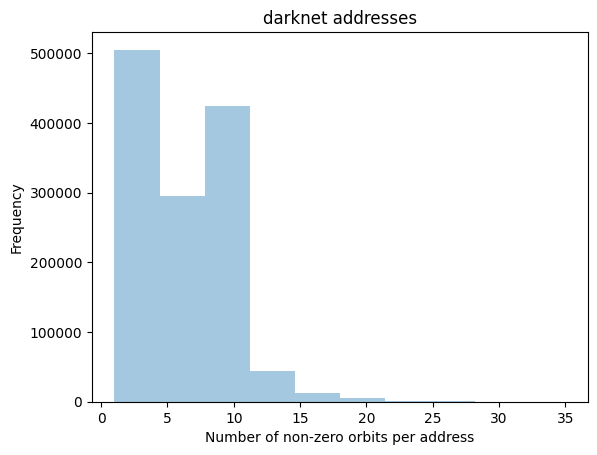

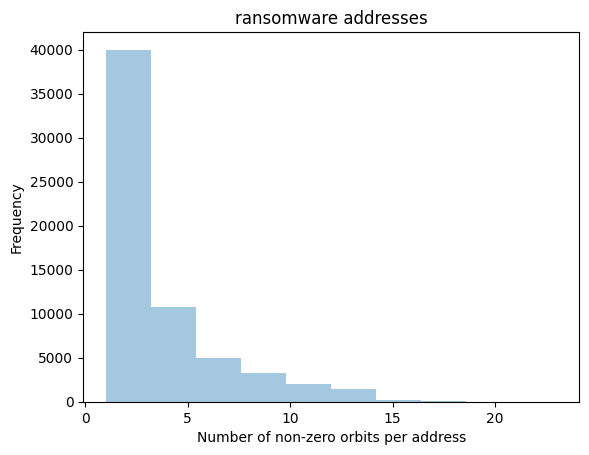

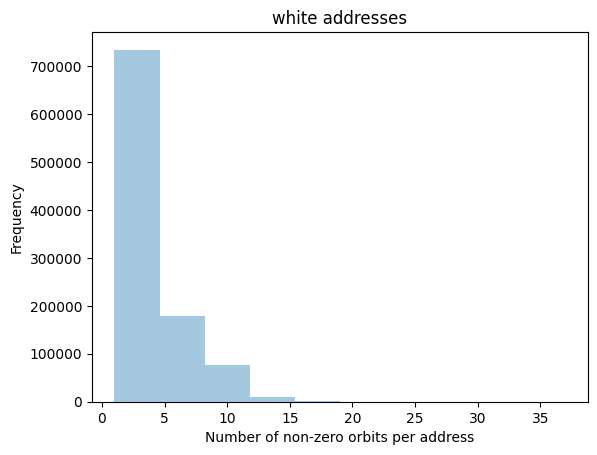

average non-zero-counts:  5.098612735303464


In [90]:
# count non-zero columns per row
non_zero_counts = data.iloc[:,4:52].astype(bool).sum(axis=1)

# group by label column
grouped = non_zero_counts.groupby(data["label"])

# create histogram for every unique label
for name, group in grouped:
    plt.figure()
    group.plot.hist(alpha=0.4, label=name)
    plt.xlabel("Number of non-zero orbits per address")
    #plt.legend()
    plt.title(name+" addresses")
plt.show()

# get average of non-zero-counts
average = non_zero_counts.mean()
print("average non-zero-counts: ", average)

In [117]:
print(ransom.iloc[:,4:52].astype(bool).sum(axis=1).median())
print(darknet.iloc[:,4:52].astype(bool).sum(axis=1).median())
print(white.iloc[:,4:52].astype(bool).sum(axis=1).median())

3.0
6.0
3.0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
# Load the data
BitcoinHeistData = pd.read_csv("/home/bcypher/Downloads/BitcoinHeistData.csv", sep=",")
heistAds = BitcoinHeistData[BitcoinHeistData['label']!='white']


# replace ransom families label with 'ransomware'
BitcoinHeistData['label'] = BitcoinHeistData['label'].replace(ransom_families, 'ransomware')

# load the allData
allData = pd.read_csv("/home/bcypher/IdeaProjects/Orbit/articleOrbits.csv", sep="\t")

# replace ransom families label with 'ransomware'
allData['label'] = allData['label'].replace(ransom_families, 'ransomware')

# select rows where address is in heistAds
allData[allData['address'].isin(heistAds['address'])]
print(allData.shape)
# merge allData and BitcoinHeistData
orbitAndHeist = pd.merge(allData, BitcoinHeistData, on=['address', 'day', 'year'])
orbitAndHeist = orbitAndHeist.drop(['label_y'], axis=1)
orbitAndHeist['label_x'] = orbitAndHeist['label_x'].astype('category')
white = orbitAndHeist[orbitAndHeist['label_x']=='white']
ransom = orbitAndHeist[orbitAndHeist['label_x']=='ransomware']
# set sample sizes
sampleSizes = [50000,100000,500000,1000000]


def get_scores(train_data,test_data,features):
    rf_both = RandomForestClassifier(n_estimators=300)
    features_train = train_data.iloc[:, features]
    #print(features_train.columns)
    rf_both.fit(features_train, train_data['label_x'])
    # predict on test and train data
    features_test = test_data.iloc[:, features]
    features_test.drop("label_x", axis=1)
    #print(features_test.columns)
    predTest = rf_both.predict(features_test)
    predTrain = rf_both.predict(features_train)
    # calculate AUC for train and test data
    trainProb = rf_both.predict_proba(features_train)[:, 1]
    testProb = rf_both.predict_proba(features_test)[:, 1]
    aucTrain = roc_auc_score(train_data['label_x'], trainProb)
    aucTest = roc_auc_score(test_data['label_x'], testProb)
    return aucTrain, aucTest

for duplication in range(0,5):
    for sampleSize in sampleSizes:

        # sample the data
        whiteSampled = white.sample(sampleSize)

        data = pd.concat([whiteSampled, ransom])
        data['label_x'] = data['label_x'].astype('category')
        # split data into training and testing sets
        trainData, testData = train_test_split(data, test_size=0.1)
        #1 create the random forest model for both orbits and bheist features
        bothFeatureSets = range(4, trainData.shape[1])
        scores=get_scores(trainData, testData, bothFeatureSets)
        print(duplication," Orbit and Heist ",sampleSize,scores[0],scores[1])

        orbitFeatures = range(4, 52)
        scores=get_scores(trainData, testData, orbitFeatures)
        print(duplication," Orbits ",sampleSize,scores[0],scores[1])

        heistFeatures = range(52, 58)
        scores=get_scores(trainData, testData, heistFeatures)
        print(duplication," Heist ",sampleSize,scores[0],scores[1])


In [152]:
data = pd.concat([white_sampled,ransom,darknet])
data['pattern'] = data[['o0', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10', 'o11', 'o12', 'o13', 'o14', 'o15', 'o16', 'o17', 'o18', 'o19', 'o20', 'o21', 'o22', 'o23', 'o24', 'o25', 'o26', 'o27', 'o28', 'o29', 'o30', 'o31', 'o32', 'o33', 'o34', 'o35', 'o36', 'o37', 'o38', 'o39', 'o40', 'o41', 'o42', 'o43', 'o44', 'o45', 'o46', 'o47']].apply(lambda x: ''.join(x.astype(str)+"\t"), axis=1)

x=data.groupby(['pattern'])['label'].apply(lambda x: x.value_counts()[0:10])
x





pattern                                                                                                                                                         
0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t         darknet    4
0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t2\t         white      1
                                                                                                                                                         darknet    1
0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t5\t         white      1
0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t1\t         white      1
         

In [153]:
x

pattern                                                                                                                                                         
0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t         darknet    4
0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t2\t         white      1
                                                                                                                                                         darknet    1
0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t5\t         white      1
0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t0\t1\t1\t         white      1
         

In [179]:
ransom = all_data[all_data['label'] == "ransomware"]
darknet = all_data[all_data['label'] == "darknet"]
white = all_data[all_data['label'] == "white"]
data = pd.concat([white,ransom,darknet])
data.label.value_counts()





white         3164874
darknet       1288100
ransomware      62641
Name: label, dtype: int64

In [180]:
data.iloc[:, 4:52] = data.iloc[:, 4:52].applymap(lambda x: 1 if x > 0 else x)
data['pattern'] = data[['o0', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10', 'o11', 'o12', 'o13', 'o14', 'o15', 'o16', 'o17', 'o18', 'o19', 'o20', 'o21', 'o22', 'o23', 'o24', 'o25', 'o26', 'o27', 'o28', 'o29', 'o30', 'o31', 'o32', 'o33', 'o34', 'o35', 'o36', 'o37', 'o38', 'o39', 'o40', 'o41', 'o42', 'o43', 'o44', 'o45', 'o46', 'o47']].apply(lambda x: ''.join(x.astype(str)), axis=1)

x=data.groupby(['pattern'])['label'].apply(lambda x: x.value_counts()[0:10])



In [185]:
# count frequency of unique values in the 'pattern' column
pattern_counts = data['pattern'].value_counts()

# select the top 3% of patterns based on frequency
top_patterns = pattern_counts.index[:100]

# select rows where the 'pattern' column is in the top 3%
top_rows = data[data['pattern'].isin(top_patterns)]
x=top_rows.groupby(['pattern'])['label'].apply(lambda x: x.value_counts()[0:10])



In [186]:
x

pattern                                                     
000000000000000000000000000000011000000000000000  white         17310
                                                  darknet        2867
                                                  ransomware      172
000000000000000000000000000000011000000011000011  white          9800
                                                  darknet           4
                                                                ...  
100000000000000000000000001000000000000000000000  darknet        1449
                                                  ransomware      198
100000000001000000000000000000000000000000000000  white         17751
                                                  darknet        5136
                                                  ransomware      446
Name: label, Length: 297, dtype: int64

In [190]:
rs= all_data[all_data['label'] == "ransomware"]
rs.iloc[:, 4:52] = rs.iloc[:, 4:52].applymap(lambda x: 1 if x > 0 else x)
rs['pattern'] = rs[['o0', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10', 'o11', 'o12', 'o13', 'o14', 'o15', 'o16', 'o17', 'o18', 'o19', 'o20', 'o21', 'o22', 'o23', 'o24', 'o25', 'o26', 'o27', 'o28', 'o29', 'o30', 'o31', 'o32', 'o33', 'o34', 'o35', 'o36', 'o37', 'o38', 'o39', 'o40', 'o41', 'o42', 'o43', 'o44', 'o45', 'o46', 'o47']].apply(lambda x: ''.join(x.astype(str)), axis=1)
rs_counts = rs['pattern'].value_counts()
top_rs_patterns = rs_counts.index[:100]

# select rows where the 'pattern' column is in the top 3%
top_rs_rows = data[data['pattern'].isin(top_rs_patterns)]
x_rs=top_rs_rows.groupby(['pattern'])['label'].apply(lambda x: x.value_counts()[0:10])


/tmp/ipykernel_309613/4134115438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs.iloc[:, 4:52] = rs.iloc[:, 4:52].applymap(lambda x: 1 if x > 0 else x)
/tmp/ipykernel_309613/4134115438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs['pattern'] = rs[['o0', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10', 'o11', 'o12', 'o13', 'o14', 'o15', 'o16', 'o17', 'o18', 'o19', 'o20', 'o21', 'o22', 'o23', 'o24', 'o25', 'o26', 'o27', 'o28', 'o29', 'o30', 'o31', 'o32', 'o33', 'o34', 'o35', 'o36',

In [191]:
x_rs

pattern                                                     
000000000000000000000000000000011000000000000000  white         17310
                                                  darknet        2867
                                                  ransomware      172
000000000000000000000000000010000000000000000000  white          7933
                                                  darknet        7007
                                                                ...  
100000000001000000000000000000000000000000000000  darknet        5136
                                                  ransomware      446
100000000001000000000000001000000000000000000000  white          1606
                                                  darknet        1158
                                                  ransomware       84
Name: label, Length: 300, dtype: int64

0    3164874
2    1288100
1      62641
Name: label, dtype: int64
['o0', 'o1', 'o2', 'o4', 'o6', 'o8', 'o10', 'o11', 'o13', 'o14', 'o16', 'o17', 'o19', 'o21', 'o23', 'o25', 'o26', 'o28', 'o29', 'o31', 'o32', 'o34', 'o35', 'o37', 'o38', 'o40', 'o41', 'o43', 'o45', 'o47']
(25258711, 52)
['0' '1' '2']


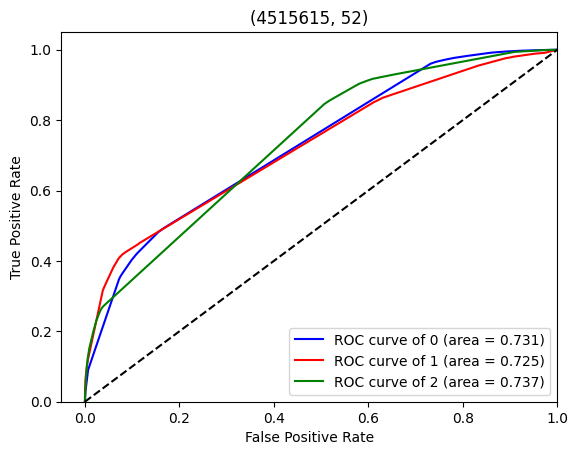

['0' '1' '2']


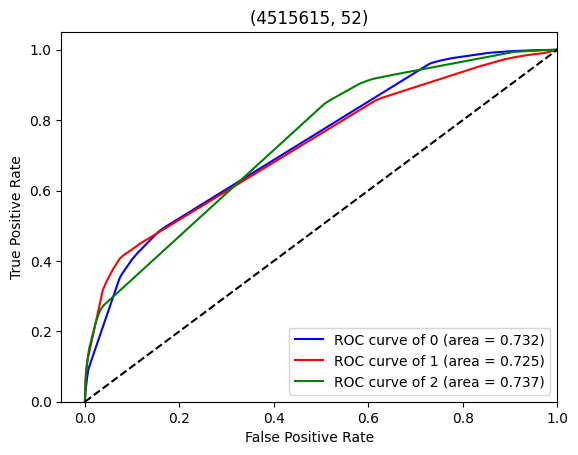

['0' '1' '2']


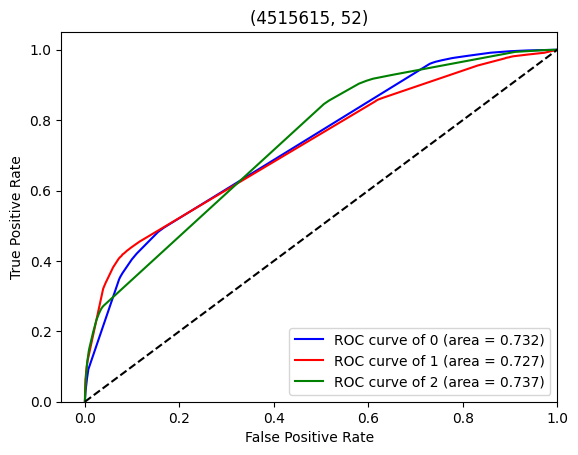

['0' '1' '2']


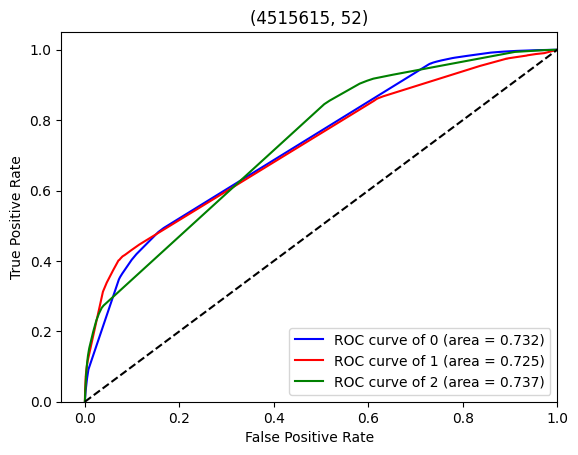

['0' '1' '2']


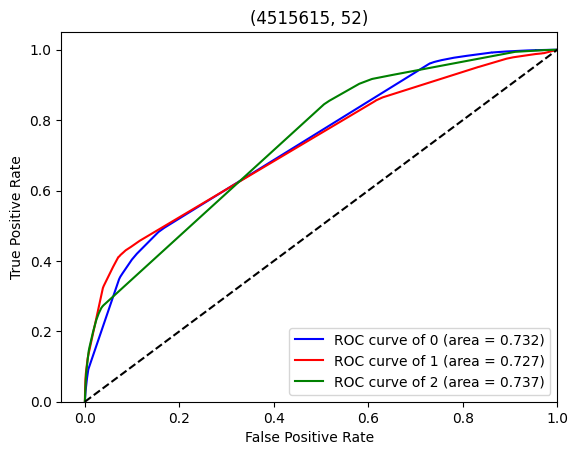

In [236]:
# active and passive orbits
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
# load the allData
allData = pd.read_csv("/home/bcypher/IdeaProjects/Orbit/v2articleOrbits.csv", sep="\t")

allData['label'] = allData['label'].replace(ransom_families, "1")
allData['label'] = allData['label'].replace("white", "0")
allData['label'] = allData['label'].replace("darknet", "2")
df2 = allData[(allData['label']=='0') | (allData['label']=='1') | (allData['label']=='2')]
print(df2.label.value_counts())
active_columns = ["o3","o5","o7","o9","o12","o15","o18","o20","o22","o24","o27","o30","o33","o36","o39","o42","o44","o46"]
all_cols = all_data.columns.tolist()
passive_columns = [col for col in all_cols if (col not in active_columns) and (col.startswith('o'))]
print(passive_columns)
print(allData.shape)

white = allData[allData['label']=='0']
ransom = allData[allData['label']=='1']
darknet = allData[allData['label']=='2']

for duplication in range(0,5):
    data = pd.concat([white,ransom,darknet])
    #X= data[passive_columns]
    X= data[active_columns]# use active and passive orbits
    #data['label'].value_counts().plot.bar(rot=0)

    y = LabelBinarizer().fit_transform(data.label.to_numpy())
    n_classes = y.shape[1]
    names = data.label.unique()
    print(names)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    classifier = OneVsRestClassifier(RandomForestClassifier())
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green' ])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                 label='ROC curve of {0} (area = {1:0.3f})'
                 ''.format(names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(data.shape)
    plt.legend(loc="lower right")
    plt.show()


